# Airline Passenger Satisfaction

## Business Problem Understanding

### Context

Suatu Maskapai Penerbangan ingin mengetahui tingkat kepuasan penumpang dari berbagai faktor, termasuk fitur kualitas layanan yang diberikan. Kepuasan penumpang menjadi salah satu faktor penting karena dapat dijadikan evaluasi untuk mengetahui seberapa baik layanan yang diberikan Maskapai Penerbangan dalam memenuhi harapan penumpang. Jika kualitas layanan Maskapai Penerbangan semakin baik, maka tingkat kepuasan dan loyalitas penumpang akan meningkat. Dengan demikian profit yang akan diperoleh pun akan meningkat. Hal ini sesuai dengan teori Service Profit Chain yang dicetuskan oleh James Heskett.

Target:

0 : neutral or dissatisfied

1 : satisfied

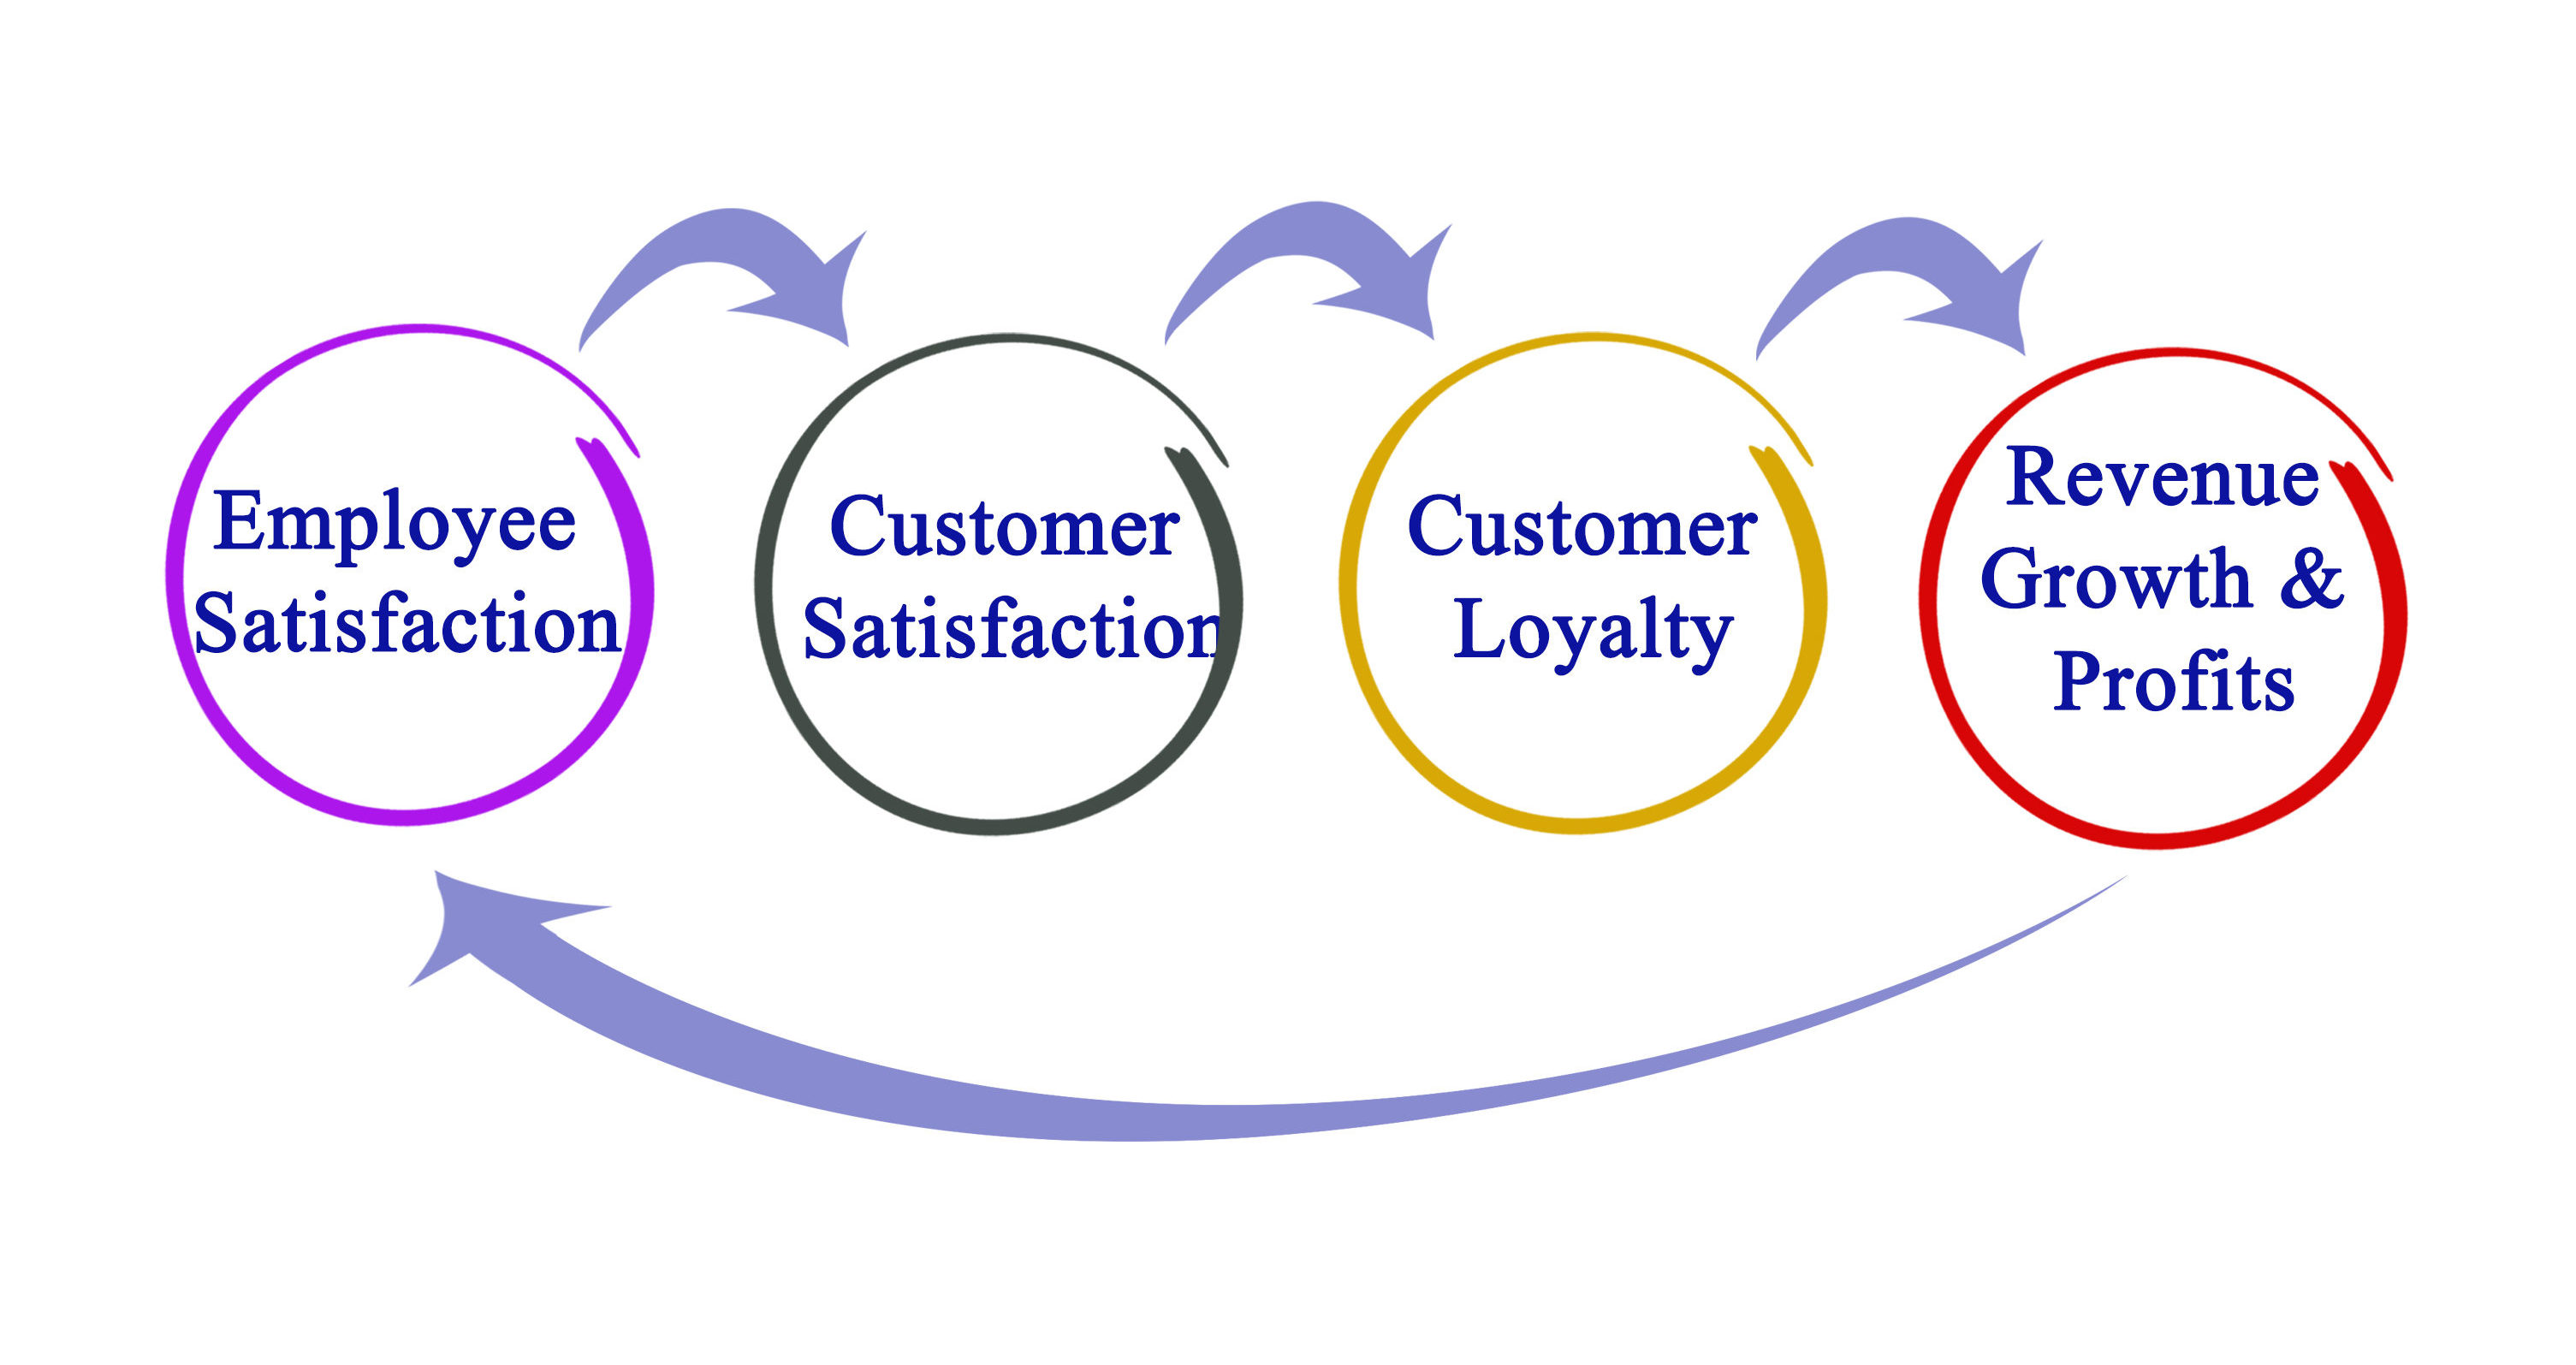

In [222]:
PATH = "/Users/Salsabila Sheriska/OneDrive/Desktop/New folder/"
Image(filename = PATH + "SPC.jpg", width=500, height=500)

Picture Source: https://workinstitute.com/the-importance-of-the-service-profit-chain-theory/

### Problem Statement
Kelangsungan hidup suatu bisnis dapat dipengaruhi oleh daya saing, reputasi dan kepuasan pelanggan. Kualitas layanan yang baik dapat meningkatkan reputasi dan kepuasan penumpang sehingga Maskapai Penerbangan akan mendapatkan keunggulan kompetitif dan kepercayaan penumpang. Namun jika kualitas layanan dinilai buruk, Maskapai Penerbangan akan mengalami penurunan minat penumpang yang juga akan mengakibatkan menurunnya pendapatan. Oleh karena itu, menganalisis dan memperbaiki fitur-fitur yang berkaitan erat dengan kepuasan penumpang sangatah penting.

Questions:

1. Berapa persentase tingkat kepuasan penumpang?
2. Bagaimana tingkat kepuasan penumpang jika dilihat dari gender dan tipe customer?
3. Bagaimana tingkat kepuasan penumpang jika dilihat dari class dan tipe perjalanan?
4. Bagaimana tingkat kepuasan penumpang jika dilihat dari jarak penerbangan pesawat?
5. Bagaimana tingkat kepuasan penumpang jika dilihat dari waktu keterlambatan pesawat pada saat keberangkatan dan kedatangan?
6. Bagaimana tingkat kepuasan penumpang jika dilihat dari usianya?
7. Bagaimana tingkat kepuasan penumpang berdasarkan rating score fitur layanannya?

### Goals
Berdasarkan permasalahan tersebut, Maskapai Penerbangan ingin mengetahui faktor-faktor yang mempengaruhi kepuasan penumpang sehingga dapat memperbaiki kualitas layananya.

### Analytic Approach
Menganalisis data untuk menemukan pola kepuasan penumpang dari berbagai fitur-fitur yang ada, sehingga Maskapai Penerbangan mampu memperbaiki layanan yang kurang dan mempertahankan layanan yang sudah memuaskan.

## Data Understanding
Dataset diterbitkan oleh TJ Klein dan difokuskan pada survei kepuasan pelanggan.
Dataset ini diperoleh dari: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

### Attribute Information
| Attribute | Data Type | Description |
| --- | --- | --- |
| gender | Object | Jenis kelamin penumpang |
| customer_type | Object | Jenis pelanggan |
| age | Object | Usia penumpang |
| type_of_travel | Object | Jenis perjalanan berdasarkan tujuan penerbangan penumpang |
| class | Integer | Kelas perjalanan penumpang |
| flight_distance | Object | Jarak Penerbangan |
| inflight_wifi_service | Integer | Tingkat kepuasan layanan wifi dalam pesawat |
| departure/arrival_time_convenient | Integer | Tingkat kepuasan waktu keberangkatan/kedatangan |
| ease_of_online_booking | Integer | Tingkat kepuasan booking online |
| gate_location | Integer | Tingkat kepuasan letak gate |
| food_and_drink | Integer | Tingkat kepuasan makan dan minum |
| online_boarding | Integer | Tingkat kepuasan boarding online |
| seat_comfort | Integer | Tingkat kepuasan kenyamanan kursi |
| inflight_entertainment | Integer | Tingkat kepuasan entertainment dalam pesawat |
| on-board_service | Integer | Tingkat kepuasan layanan on-board |
| leg_room_service | Integer | Tingkat kepuasan layanan leg room |
| baggage_handling | Integer | Tingkat kepuasan penanganan bagasi |
| checkin_service | Integer | Tingkat kepuasan layanan checkin |
| inflight_service | Integer | Tingkat kepuasan layanan dalam pesawat |
| cleanliness | Integer | Tingkat kepuasan kebersihan |
| departure_delay_in_minutes | Integer | Keterlambatan keberangkatan dalam menit|
| arrival_delay_in_minutes | Integer | Keterlambatan kedatangan dalam menit |
| satisfaction | Float | Tingkat kepuasan penumpang (0 – Neutral or dissatisfied, 1 – Satisfied) |

In [223]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sns
from IPython.display import display

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [224]:
#Load Dataset
df = pd.read_csv("train_airpass.csv")
df.head()

,Unnamed: 0,Id,Gender,Customer type,Age,Type of travel,Class,Flight distance,Inflight wifi service,Departure/Arrival time convenient,Ease of online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure delay in minutes,Arrival delay in minutes,Satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of online booking             103904 non-null  int64  
 11  Gate location                      1039

Dapat dilihat bahwa jumlah baris dan kolom pada dataset adalah 103.904 baris dan 25 kolom.

## Data Cleaning

In [226]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 25)


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,103904,"[38247, 26239]"
1,Id,int64,0,0.0,103904,"[501, 62578]"
2,Gender,object,0,0.0,2,"[Male, Female]"
3,Customer type,object,0,0.0,2,"[disloyal Customer, Loyal Customer]"
4,Age,int64,0,0.0,75,"[57, 39]"
5,Type of travel,object,0,0.0,2,"[Personal Travel, Business travel]"
6,Class,object,0,0.0,3,"[Business, Eco Plus]"
7,Flight distance,int64,0,0.0,3802,"[376, 157]"
8,Inflight wifi service,int64,0,0.0,6,"[5, 2]"
9,Departure/Arrival time convenient,int64,0,0.0,6,"[4, 0]"


#### Dapat diketahui bahwa:
- Kolom Unnamed: 0 dan Id dapat dihapus saja karena berisikan data unik.
- Missing value hanya berada di kolom Arrival_delay_in_minutes dengan proporsi <10%, yakni 0,3%. Untuk penanganan data kosong ini, karena proporsinya tidak banyak dan memang tidak ada cara yang dirasa sesuai untuk mengisi data kosongnya, maka data bisa dihapus saja.

In [227]:
# Menghapus Data Kosong pada Kolom 'Arrival delay in minutes'
df.dropna(subset= ['Arrival delay in minutes'], inplace=True)

# Menghapus Kolom yang Berisikan Data Unik (Tidak Memiliki Data Duplikat)
df.drop(columns=['Unnamed: 0','Id'],inplace=True)

# Mengganti Spasi pada Nama Kolom dengan Underscore
df.columns = [c.replace(' ', '_') for c in df.columns]

# Mengganti Label Kolom "Satisfaction" dengan Nilai 0 dan 1 (neutral or dissatisfied = 0 dan satisfied = 1)
df['Satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

# Mengganti disloyal Customer pada Kolom "Customer_type" dengan Disloyal Customer
df['Customer_type'].replace({'disloyal Customer': 'Disloyal Customer'},inplace = True)

# Mengganti Business travel pada Kolom "Type_of_travel" dengan Business Travel
df['Type_of_travel'].replace({'Business travel': 'Business Travel'},inplace = True)

# Mengganti tipe Data pada Kolom Arrival_delay_in_minutes
df['Arrival_delay_in_minutes'] = df['Arrival_delay_in_minutes'].astype('int64')

# Mengganti tipe Data pada Kolom Satisfaction
df['Satisfaction'] = df['Satisfaction'].astype('float')

In [228]:
# Pengecekan Data Kembali
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
df_desc

(103594, 23)


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Gender,object,0,0.0,2,"[Female, Male]"
1,Customer_type,object,0,0.0,2,"[Disloyal Customer, Loyal Customer]"
2,Age,int64,0,0.0,75,"[35, 29]"
3,Type_of_travel,object,0,0.0,2,"[Personal Travel, Business Travel]"
4,Class,object,0,0.0,3,"[Business, Eco]"
5,Flight_distance,int64,0,0.0,3802,"[788, 3507]"
6,Inflight_wifi_service,int64,0,0.0,6,"[0, 2]"
7,Departure/Arrival_time_convenient,int64,0,0.0,6,"[4, 0]"
8,Ease_of_online_booking,int64,0,0.0,6,"[2, 4]"
9,Gate_location,int64,0,0.0,6,"[1, 5]"


#### Dari tabel tersebut, dapat diketahui bahwa:
Setelah dibersihkan, data yang sebelumnya terdapat 103.904 menjadi 103.594 baris data karena ada 310 baris data yang kosong dihapus. Selain itu, data tersebut juga menjadi 23 kolom karena 2 kolom yang berisi data unik dihapus.

In [229]:
display(df.describe(), df.describe(include='object'))

,Age,Flight_distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_delay_in_minutes,Arrival_delay_in_minutes,Satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


,Gender,Customer_type,Type_of_travel,Class
count,103594,103594,103594,103594
unique,2,2,2,3
top,Female,Loyal Customer,Business Travel,Business
freq,52576,84662,71465,49533


- Fitur yang berkaitan dengan data penumpang dan riwayat penerbangan:
        ['Gender', 'Customer_type', 'Type_of_travel', 'Class', 'Age', 'Flight_distance', 'Departure_delay_in_minutes', 
        'Arrival_delay_in_minutes']
- Fitur yang berkaitan dengan layanan Maskapai Penerbangan : 
        ['Inflight_wifi_service, Departure/Arrival_time_convenient', 'Ease_of_online_booking', 'Gate_location'
        'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service'
        'Leg_rom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness']
- Rating score untuk fitur layanan adalah 1-5; 0 - Tidak Berlaku
- Kolom 'Satisfaction' merupakan kolom target (0 – Neutral or dissatisfied, 1 – Satisfied)

## Explanatory Data Analysis

### 1. Berapa persentase tingkat kepuasan penumpang?

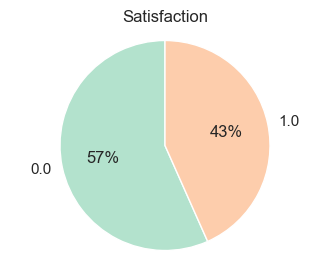

In [230]:
fig, axes = plt.subplots(figsize = (4,3))
column_values = df['Satisfaction'].value_counts()
labels = column_values.index
sizes = column_values.values
axes.pie(sizes, labels = labels, colors = sns.color_palette("Pastel2"), autopct = '%1.0f%%', startangle = 90)
axes.axis('equal')
axes.set_title(col)
plt.show()

### Insight: 
Dari plot di atas, dapat diketahui bahwa `persentase` penumpang yang `puas` dengan pelayanan Maskapai Penerbangan adalah sekitar `43%` dan penumpang yang `netral/tidak puas` sekitar `57%`.  Artinya, jumlah penumpang yang `puas lebih kecil` daripada penumpang yang `netral/tidak puas`. Salah satu upaya yang dapat dilakukan Maskapai Penerbangan adalah dengan `meningkatkan kualitas layanan` yang mampu memenuhi kebutuhan dan harapan penumpang.

### 2. Bagaimana tingkat kepuasan penumpang jika dilihat dari gender dan tipe customer?

In [231]:
def stacked_plot(x):  
    sns.set(palette='Pastel2')

    tab = pd.crosstab(x,df['Satisfaction'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(8,3))
    
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1))
    plt.ylabel('Proportion')
    plt.xticks(np.arange(len(tab.index.tolist())),tab.index.tolist(),rotation=0)
    plt.show()

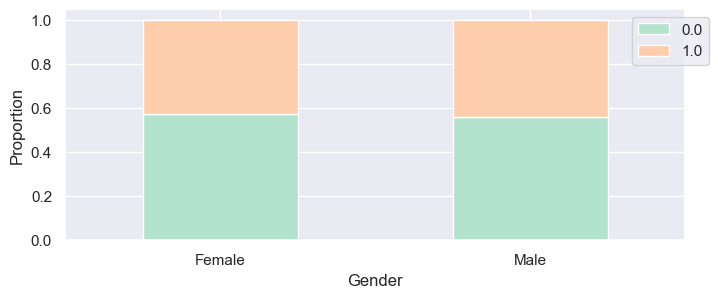

In [232]:
stacked_plot(df['Gender'])

### Insight:
Dari plot di atas, dapat diketahui bahwa proporsi tingkat kepuasan penumpang untuk `tiap gender relatif sama`, dimana penumpang yang `puas sedikit lebih sedikit` dibandingkan dengan penumpang yang `netral/tidak puas`.

Hal ini menunjukkan bahwa `gender tidak memiliki peran penting` dalam tingkat kepuasan penumpang, karena pria dan wanita sama-sama memperhatikan fitur layanan yang sama.

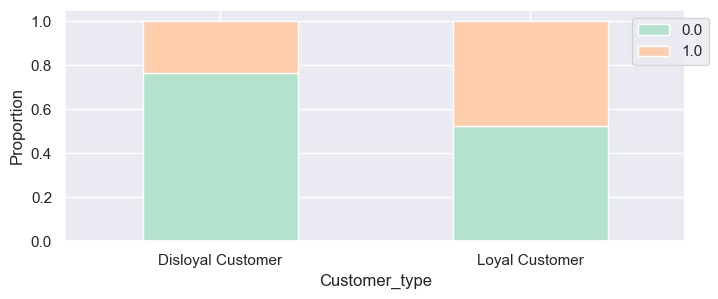

In [233]:
stacked_plot(df['Customer_type'])

### Insight:
Dari plot di atas, dapat diketahui bahwa proporsi tingkat kepuasan `loyal customer` adalah `sekitar 50%` sedangkan `disloyal customer hanya 20%`. Artinya, proporsi penumpang yang `puas` pada `loyal customer lebih banyak` dibandingkan dengan `disloyal customer`. Salah satu penyebabnya adalah `loyal customer` sudah sering menggunakan jasa Maskapai Penerbangan sehingga sudah terbiasa dan jadi lebih tau dengan pelayanan yang diberikan. Hal ini juga memungkinkan jika prioritas Maskapai Penerbangan adalah menjaga kepuasan `customer loyal`.

Namun, `ketidakpuasan disloyal customer` juga tidak bisa dibiarkan begitu saja karena proporsi penumpang yang `netral/tidak puas hampir mencapai 80%`. Maskapai penerbangan dapat meningkatkan layanan pada `disloyal customer` sehingga tingkat kepuasan penumpang secara keseluruhan juga meningkat.

### 3. Bagaimana tingkat kepuasan penumpang jika dilihat dari class dan tipe perjalanan?

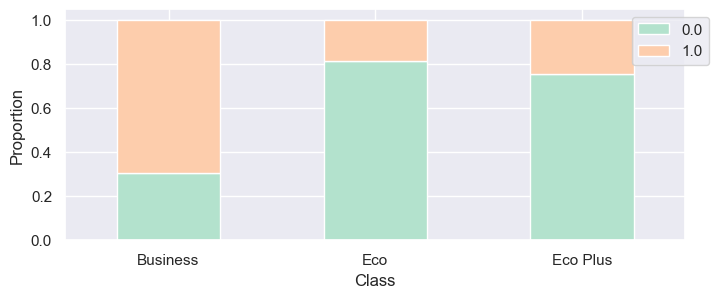

In [234]:
stacked_plot(df['Class'])

### Insight:
Dari plot di atas, dapat diketahui bahwa proporsi penumpang yang `puas` pada `business class lebih banyak` dibandingkan dengan `eco & eco plus`.

Hal ini menunjukkan bahwa dengan harga yang lebih mahal, Maskapai Penerbangan menawarkan berbagai macam kelebihan yang hanya diperoleh penumpang `business class`. Namun jika proporsi `ketidakpuasan` penumpang `business class lebih banyak`, artinya pelayanan yang diberikan Maskapai Penerbangan mengecewakan penumpang.

`Tingkat ketidakpuasan` pada penumpang `eco & eco plus` juga tidak dapat dibiarkan begitu saja, karena hal tersebut menandakan bahwa layanan yang diberikan masih belum memenuhi harapan penumpang. Oleh karena itu, pelayanan pada penerbangan `eco & eco plus` masih perlu ditingkatkan lagi.

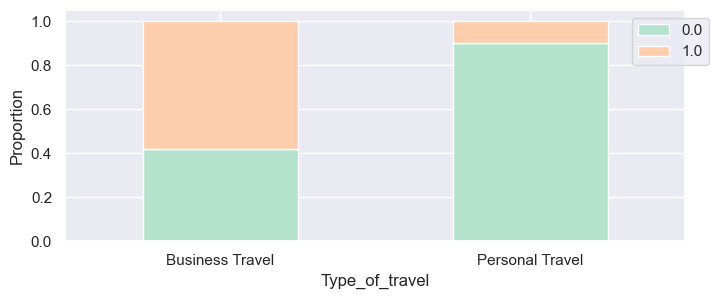

In [235]:
stacked_plot(df['Type_of_travel'])

### Insight:
Dari plot di atas, dapat diketahui bahwa `tingkat kepuasan` penumpang `business travel` adalah `sekitar 60%` sedangkan penumpang `personal travel` hanya `10%`. Artinya, proporsi penumpang yang `netral/tidak puas` pada `personal travel jauh lebih banyak` dibandingkan dengan `business travel`. 

Hal ini menunjukkan bahwa kepuasan penumpang `business travel` adalah karena biaya perjalanannya ditanggung perusahaan, sehingga mereka tidak perlu memakai uang pribadi untuk kebutuhan bisnis yang berkaitan dengan pekerjaan atau urusan kantor. Sedangkan pada penumpang `personal travel`, mereka harus bayar sendiri biaya perjalanannya. 

Salah satu upaya yang dapat dilakukan Maskapai Penerbangan untuk mengatasi `ketidakpuasan` penumpang `personal travel` adalah dengan memberikan promo paket perjalanan.

### 4. Bagaimana tingkat kepuasan penumpang jika dilihat dari jarak penerbangan pesawat?

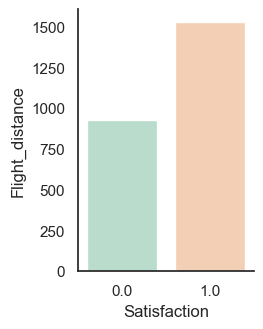

In [236]:
with sns.axes_style('white'):
    g = sns.catplot(errorbar=None, x="Satisfaction", y="Flight_distance", data=df, kind="bar", height=3.5, aspect=.8)

### Insight:
Dari plot di atas dapat diketahui bahwa penumpang merasa `puas` dengan `jarak penerbangan yang jauh`, sedangkan untuk `jarak penerbangan yang lebih singkat` penumpang cenderung merasa `netral/tidak puas`. Hal ini membuktikan bahwa `singkatnya jarak penerbangan` membuat penumpang masih kurang merasakan pelayanan yang diberikan maskapai, sehingga pelayanan pada penerbangan jarak pendek masih belum terlihat. Salah satu upaya yang dapat dilakukan Maskapai Penerbangan adalah dengan meningkatkan beberapa kualitas layanan, seperti `ease of online booking`, `online boarding`, `checkin service`, `baggage handling`.

### 5. Bagaimana tingkat kepuasan penumpang jika dilihat dari waktu keterlambatan pesawat pada saat keberangkatan dan kedatangan?

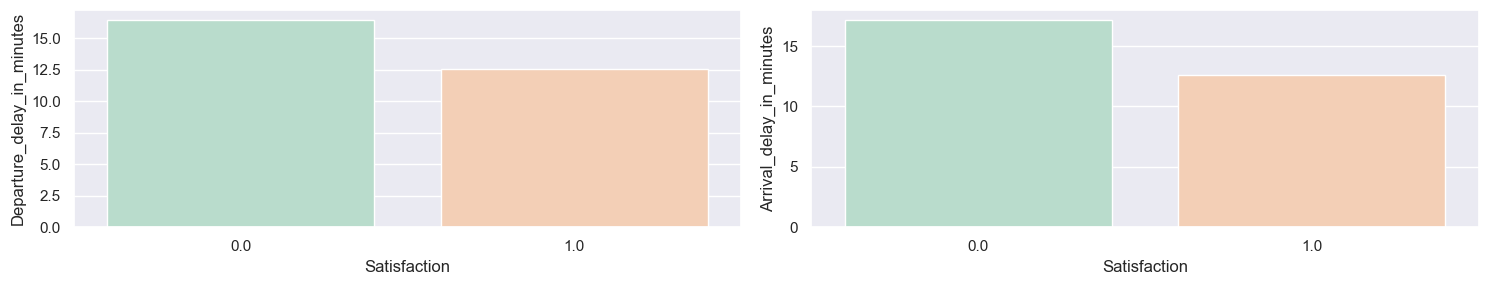

In [237]:
categ = ["Departure_delay_in_minutes", "Arrival_delay_in_minutes"]
fig, axs = plt.subplots(1,2, figsize=(15,3))
    
fig.tight_layout(pad=1.5)
for feature,ax in zip(categ,axs.ravel()):
    ax = sns.barplot(errorbar=None, ax=ax, x="Satisfaction", y=feature, palette= 'Pastel2', data=df)    

### Insight:
Dari plot di atas dapat diketahui bahwa pada fitur `waktu keterlambatan pesawat`, penumpang merasa `netral/tidak puas` ketika rata-rata menit waktu tundanya adalah `12,5 atau lebih`. Beberapa faktor yang menyebabkan penumpang merasa `netral/ tidak puas` adalah karena penumpang memiliki keperluan sesaat setelah pesawatnya landing. Maskapai Penerbangan dapat memberikan kompensasi untuk penumpang sebagai salah satu upaya untuk mengatasi delay. 

### 6. Bagaimana tingkat kepuasan penumpang jika dilihat dari usianya?

In [238]:
print("Rentang usia penumpang:",df["Age"].min(),"-",df["Age"].max())

Rentang usia penumpang: 7 - 85


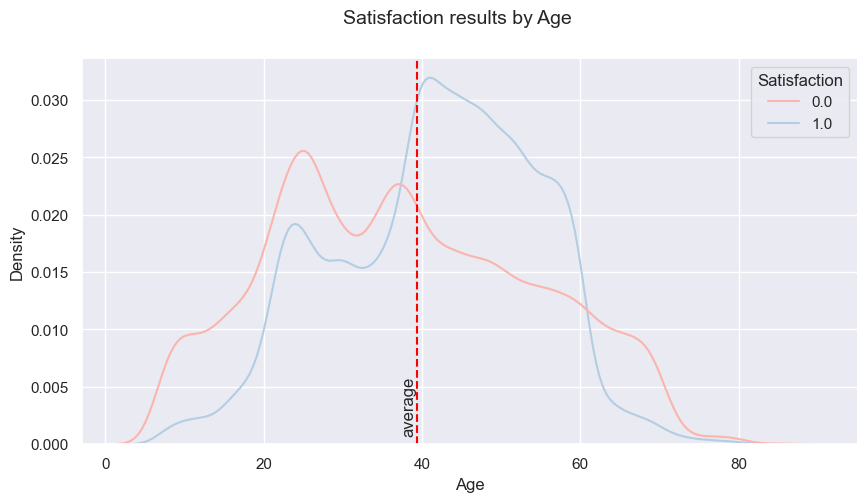

In [239]:
plt.figure(figsize = (10,5))
sns.kdeplot(data = df, x= "Age", hue = "Satisfaction", common_norm = False, palette ="Pastel1")

plt.suptitle("Satisfaction results by Age", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.axvline(df["Age"].mean(),ls = "--", color = "red")
plt.text(df["Age"].mean()-2,0.001,'average',rotation=90)
plt.show()

### Insight:
Dari plot di atas, dapat diketahui bahwa `usia rata-rata` penumpang adalah sekitar `40 tahun` dan `rentang usianya` adalah `7-85 tahun`. Sekitar pada rentang usia `40-60 tahun`, penumpang yang `puas` lebih banyak dibandingkan dengan penumpang yang berada `di luar rentang usia` tersebut. 

Hal ini menunjukkan bahwa penumpang dengan usia `di bawah 40 tahun` dan `di atas 60 tahun` lebih sulit untuk dipuaskan. Salah satu penyebabnya adalah fasilitas yang diberikan Maskapai Penerbangan kurang memenuhi harapan penumpang dengan usia tersebut. Upaya yang dapat dilakukan Maskapai Penerbangan adalah dengan memberikan penanganan layanan sesuai dengan usianya.

Untuk penumpang dengan usia `di bawah 40 tahun`, Maskapai Penerbangan dapat meningkatkan fasilitas pada `inflight entertainment` seperti menyediakan film dan program TV dengan berbagai kategori. Maskapai Penerbangan juga dapat meningkatkan fasilitas untuk kenyamanan penumpang dengan usia `di atas 60 tahun`, seperti pada fitur layanan `seat comfort` atau `leg room service`.

Ini juga memungkinkan adanya faktor-faktor lain yang menyebabkan penumpang merasa kurang puas sehingga Maskapai Penerbangan perlu melakukan analisis fitur-fitur layanannya.

### 7. a. Bagaimana tingkat kepuasan penumpang berdasarkan rating score fitur layanan on-board service, leg room service, checkin service, dan inflight service?

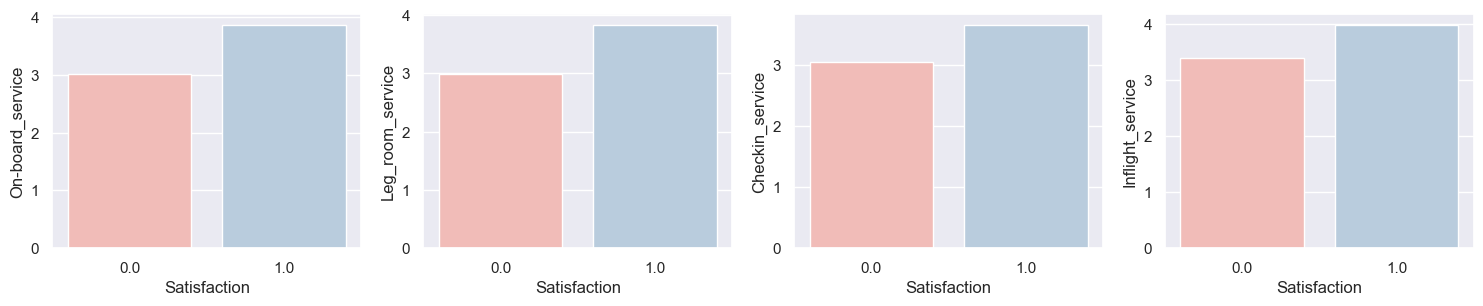

In [240]:
categ1 = ["On-board_service", "Leg_room_service", "Checkin_service", "Inflight_service"]

fig, axs = plt.subplots(1,4, figsize=(15,3))
    
fig.tight_layout(pad=1.0)
for feature,ax in zip(categ1,axs.ravel()):
    ax = sns.barplot(errorbar=None, ax=ax, x="Satisfaction", y=feature, palette= 'Pastel1', data=df)    

### Insight:
Plot di atas menunjukkan bahwa dari total rating score 5, fitur layanan `on-board service, leg room service, dan inflight service` memperoleh kisaran rata-rata rating score `4` dan `3,5` untuk fitur layanan `checkin service`. Artinya, penumpang sudah merasa `puas untuk tiap fitur layanan` yang diberikan Maskapai Penerbangan tersebut. 

Dari hasil tersebut juga dapat diketahui bahwa kualitas layanan `on-board service`, `leg room service`, `checkin service`, dan `inflight service` sudah `cukup baik`. Maskapai Penerbangan dapat menjaga kualitas layanan tersebut agar rata-rata rating score yang diperoleh tidak mengalami penurunan.

### 7. b. Bagaimana tingkat kepuasan penumpang berdasarkan rating score fitur layanan ease of online booking, food and drink, seat comfort, dan cleanliness

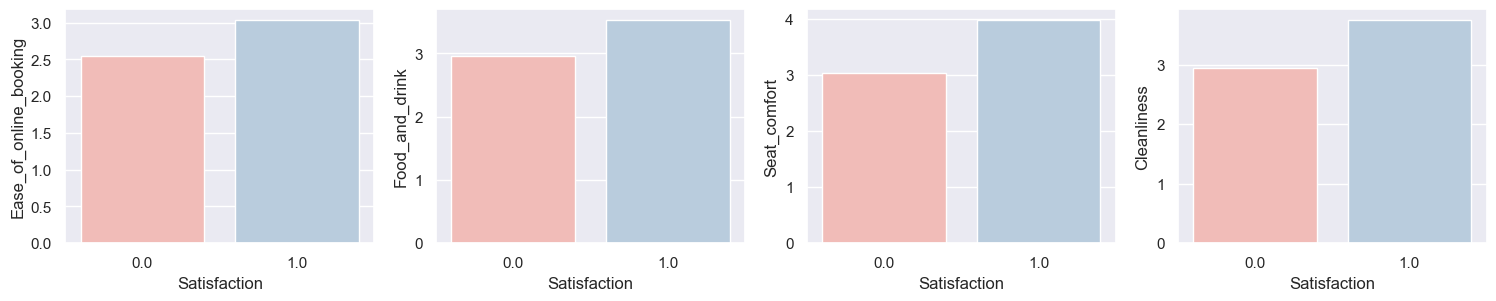

In [241]:
categ2 = ["Ease_of_online_booking", "Food_and_drink", "Seat_comfort", "Cleanliness"]

fig, axs = plt.subplots(1,4, figsize=(15,3))
    
fig.tight_layout(pad=1.0)
for feature,ax in zip(categ2,axs.ravel()):
    ax = sns.barplot(errorbar=None, ax=ax, x="Satisfaction", y=feature, palette= 'Pastel1', data=df)    

### Insight:
Plot di atas menunjukkan bahwa dari total rating score 5, fitur layanan `seat comfort` memperoleh kisaran rata-rata rating score `4` dan `3,5` untuk fitur layanan `food and drink dan clenliness`. Artinya, penumpang merasa `puas untuk tiap fitur layanan` yang diberikan Maskapai Penerbangan tersebut. Sedangkan fitur layanan `ease of online booking` masih memperoleh kisaran rata-rata rating score `3`.

Salah satu penyebab rata-rata rating score fitur layanan `ease of online booking` masih rendah adalah karena penumpang masih kesulitan untuk melakukan booking online. Untuk mengatasi hal tersebut, Maskapai Penerbangan dapat bekerjasama dengan jasa penjualan tiket online atau menempatkan operator sistem yang akan membantu penumpang dalam memesan tiket online.

### 7. c. Bagaimana tingkat kepuasan penumpang berdasarkan rating score fitur layanan inflight wifi service, gate location, inflight entertainment, dan baggage handling?

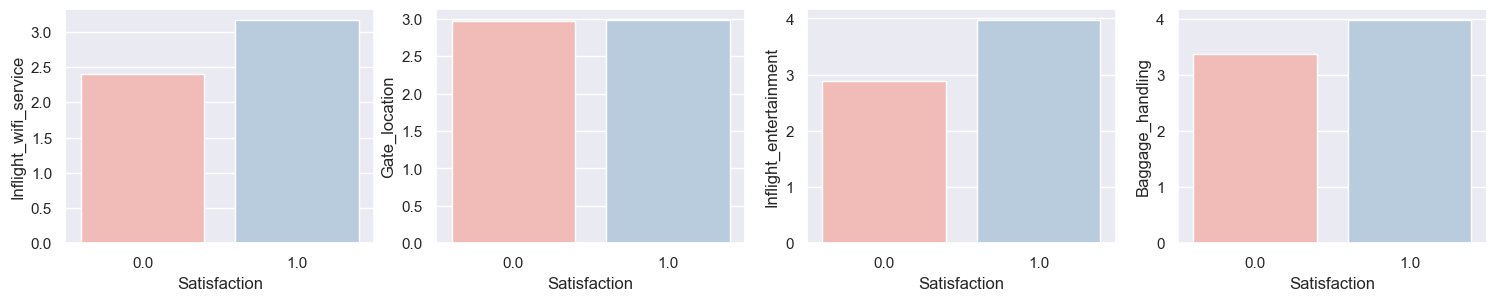

In [242]:
categ3 = ["Inflight_wifi_service", "Gate_location", "Inflight_entertainment", "Baggage_handling"]

fig, axs = plt.subplots(1,4, figsize=(15,3))
    
fig.tight_layout(pad=1.0)
for feature,ax in zip(categ3,axs.ravel()):
    ax = sns.barplot(errorbar=None, ax=ax, x="Satisfaction", y=feature, palette= 'Pastel1', data=df)    

### Insight:
Plot di atas menunjukkan bahwa dari total rating score 5, fitur layanan `inflight entertainment dan baggage handling` memperoleh kisaran rata-rata rating score `4`. Artinya, penumpang merasa `puas untuk tiap fitur layanan` yang diberikan Maskapai Penerbangan tersebut. Sedangkan fitur layanan `inflight wifi service dan gate location` masih memperoleh kisaran rata-rata rating score `3`. 

Salah satu penyebab rata-rata rating score fitur layanan `inflight wifi service` masih rendah adalah karena wifi dalam pesawat mahal dan lambat. Untuk mengatasi hal tersebut, Maskapai Penerbangan dapat menurunkan harga atau meningkatkan kecepatan wifi. Sedangkan untuk fitur layanan `gate location` adalah karena jarak gate location yang terlalu jauh dengan pintu masuk dan keluar bandara atau petunjuk arah menuju gate location itu sendiri masih minim. Maskapai Penerbangan dapat menambahkan detail petunjuk arah sehingga dapat memudahkan penumpang untuk membacanya. Dan untuk jarak gate location yang terlalu jauh, Maskapai Penerbangan dapat melakukan peninjauan lapangan.

### 7. d. Bagaimana tingkat kepuasan penumpang berdasarkan rating score fitur layanan departure/arrival time convenient dan online boarding?

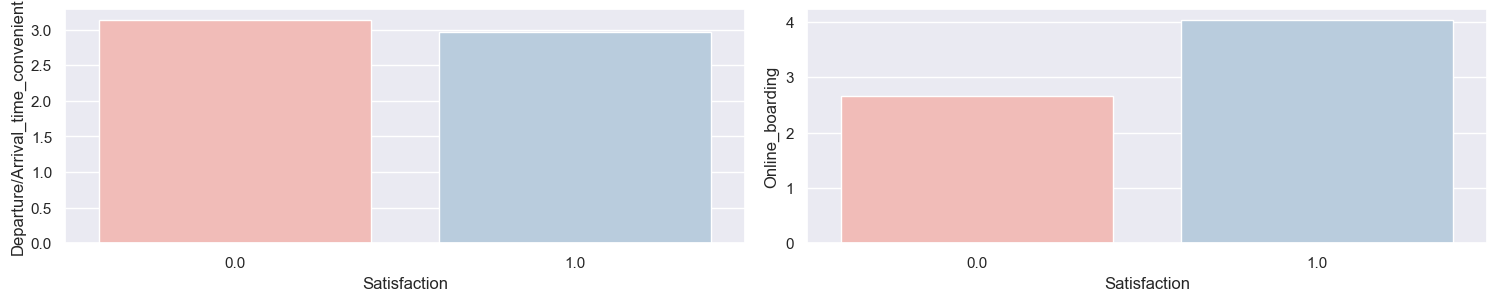

In [243]:
categ4 = ["Departure/Arrival_time_convenient", "Online_boarding"]

fig, axs = plt.subplots(1,2, figsize=(15,3))
    
fig.tight_layout(pad=1.0)
for feature,ax in zip(categ4,axs.ravel()):
    ax = sns.barplot(errorbar=None, ax=ax, x="Satisfaction", y=feature, palette= 'Pastel1', data=df)    

### Insight:
Plot di atas menunjukkan bahwa dari total rating score 5, fitur layanan `online boarding` memperoleh kisaran rata-rata rating score `4`. Artinya, penumpang merasa `puas dengan fitur layanan` yang diberikan Maskapai Penerbangan tersebut. Sedangkan fitur layanan `departure/arrival time convenient` masih memperoleh kisaran rata-rata rating score `3`.

Dari hasil tersebut juga dapat diketahui bahwa pada fitur layanan `departure/arrival time convenient`, penumpang yang `netral/tidak puas lebih banyak` dibandingkan dengan penumpang yang`puas`. `Ketidakpuasan` tersebut dikarenakan tidak sesuainya waktu keberangkatan dan kedatangan pesawat. Jika memang ada perubahan jadwal, Maskapai Penerbangan dapat menginformasikan terlebih dahulu dan memberikan kompensasi kepada penumpang.

## Conclusion
Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan terkait dengan faktor-faktor yang mempengaruhi kepuasan penumpang sehingga dapat memperbaiki kualitas layanannya. Berikut beberapa kesimpulan yang didapat:
- `Persentase` penumpang yang `puas lebih kecil` daripada penumpang yang `netral/tidak puas`, yakni sekitar `43%`.
- `Gender` tidak memiliki peran penting dalam tingkat kepuasan penumpang, karena pria dan wanita sama-sama memperhatikan fitur layanan yang sama.
- Proporsi penumpang yang `puas` pada `loyal customer lebih banyak` dibandingkan dengan `disloyal customer`.
- Proporsi penumpang yang `puas` pada `business class jauh lebih banyak` dibandingkan dengan `eco & eco plus`.
- Proporsi penumpang yang `netral/tidak puas` pada `personal travel jauh lebih banyak` dibandingkan dengan `business travel`, yakni sekitar `90%`. 
- Penumpang cenderung merasa `netral/tidak puas` untuk `jarak penerbangan yang lebih singkat`.
- Penumpang merasa `netral/tidak puas` ketika `rata-rata menit waktu tundanya` adalah `12,5 atau lebih`
- Pada rentang usia `40-60 tahun`, penumpang yang `puas` lebih banyak dibandingkan dengan penumpang yang berada `di luar rentang usia` tersebut. 
- Penumpang sudah merasa `puas` untuk fitur layanan `on-board service`, `leg room service`, `checkin service`, `inflight service`, `seat comfort`, `food and drink`, `clenliness`, `inflight entertainment`, `baggage handling`, dan `online boarding`.
- Fitur layanan yang masih memperoleh rata-rata rating score rendah adalah `ease of online booking`, `inflight wifi service`, `gate location`, dan `departure/arrival time convenient`.

## Recommendation
- Untuk mengatasi `Ketidakpuasan disloyal customer`, Maskapai Penerbangan dapat meningkatkan layanannya sehingga tingkat kepuasan penumpang secara keseluruhan juga meningkat.
- `Tingkat ketidakpuasan` pada penumpang `eco & eco plus` menandakan bahwa layanan yang diberikan masih belum memenuhi harapan penumpang. Oleh karena itu, pelayanan pada penerbangan `eco & eco plus` masih perlu ditingkatkan lagi.
- Maskapai Penerbangan dapat memberikan promo paket perjalanan untuk mengatasi `ketidakpuasan` penumpang `personal travel`.
- Untuk meningkatkan kepuasan penumpang dengan `penerbangan jarak pendek` adalah dengan meningkatkan beberapa kualitas layanan, seperti `ease of online booking`, `online boarding`, `checkin service`, `baggage handling`.
- Penumpang dengan usia `di bawah 40 tahun` dan `di atas 60 tahun` lebih sulit untuk dipuaskan. Untuk penumpang dengan usia `di bawah 40 tahun`, Maskapai Penerbangan dapat meningkatkan fasilitas pada `inflight entertainment` seperti menyediakan film dan program TV dengan berbagai kategori. Maskapai Penerbangan juga dapat meningkatkan fasilitas untuk kenyamanan penumpang dengan usia `di atas 60 tahun`, seperti pada fitur layanan `seat comfort` atau `leg room service`.
- Maskapai Penerbangan dapat bekerjasama dengan jasa penjualan tiket online atau menempatkan operator sistem yang akan membantu penumpang dalam memesan tiket online untuk mengaratasi rata-rata rating score fitur layanan `ease of online booking` yang masih rendah.
- Untuk mengatasi rata-rata rating score fitur layanan `inflight wifi service` yang masih rendah, Maskapai Penerbangan dapat menurunkan harga atau meningkatkan kecepatan wifi. Sedangkan untuk fitur layanan `gate location`, Maskapai Penerbangan dapat menambahkan detail petunjuk arah sehingga dapat memudahkan penumpang untuk membacanya. Dan untuk jarak gate location yang terlalu jauh, Maskapai Penerbangan dapat melakukan peninjauan lapangan.
- Maskapai Penerbangan dapat menginformasikan terlebih dahulu dan memberikan kompensasi kepada penumpang untuk mengatasi `tingkat ketidakpuasan` pada fitur layanan `departure/arrival time convenient` dan `departure/arrival delay`.